I used similar dataset to predict the house prices but I trained my model with linear regression algorithm which is a machine learning algorithm. To see how to implement neural network on ml based problems and practice to methods that I've learned, I chose this project.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import boston_housing

In [2]:
# get the data
boston = boston_housing.load_data()
boston

65536/57026 [==================================] - 0s 0us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [3]:
(X_train, y_train), (X_test, y_test) = boston

In [4]:
X_train.shape # 404 training data

(404, 13)

In [15]:
X_test.shape # 102 test data

(102, 13)

In [13]:
y_train.shape

(404,)

In [7]:
y_test.shape

(102,)

In [9]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [11]:
# there is inconsistency between the scales of the features so let's standardize them
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

In [41]:
# generate the network

network = keras.models.Sequential()
network.add(keras.layers.Dense(32, activation='relu', input_shape=(13, )))
network.add(keras.layers.Dense(32, activation='relu'))
network.add(keras.layers.Dense(1)) # no need for activation function here because we want to get a scaler predict

In [47]:
# compile the network
network.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [60]:
# fit the network (training phase) and to find the optimal epoch let's make a difference and try to use earlystopping 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
network.fit(X_train, y_train,validation_data=[X_test, y_test], epochs=150, batch_size=128, callbacks=early_stop)

Epoch 1/150
4/4 [==============================] - 0s 23ms/step - loss: 2.5527 - mae: 1.1652 - val_loss: 14.4473 - val_mae: 2.7994
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 2.4953 - mae: 1.1524 - val_loss: 14.1881 - val_mae: 2.7143
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 2.5874 - mae: 1.1842 - val_loss: 14.2258 - val_mae: 2.7520
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 2.5298 - mae: 1.1564 - val_loss: 14.5404 - val_mae: 2.7423
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 2.5522 - mae: 1.1762 - val_loss: 14.1598 - val_mae: 2.7272
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 2.5546 - mae: 1.1715 - val_loss: 14.1074 - val_mae: 2.6962
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 2.5413 - mae: 1.1649 - val_loss: 14.4616 - val_mae: 2.7694


Text(0, 0.5, 'loss')

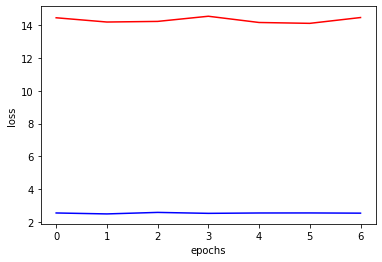

In [73]:
# visualize the mae
plt.plot(network.history.history['val_loss'], 'r')
plt.plot(network.history.history['loss'], 'b')
plt.xlabel('epochs')
plt.ylabel('loss')

In [74]:
# make predictions
preds = network.predict(X_test)
preds

array([[ 5.25885  ],
       [19.193907 ],
       [24.02982  ],
       [30.427513 ],
       [25.170214 ],
       [23.534315 ],
       [29.699223 ],
       [22.78054  ],
       [20.47967  ],
       [18.672304 ],
       [21.85261  ],
       [17.69724  ],
       [17.693398 ],
       [44.850185 ],
       [16.109177 ],
       [21.53201  ],
       [28.05123  ],
       [21.672508 ],
       [16.70581  ],
       [17.422417 ],
       [10.443408 ],
       [ 8.321286 ],
       [22.340364 ],
       [16.412046 ],
       [22.548859 ],
       [19.678457 ],
       [28.348143 ],
       [31.155132 ],
       [ 8.1660185],
       [20.819485 ],
       [20.506886 ],
       [10.57439  ],
       [32.659393 ],
       [25.838379 ],
       [13.299114 ],
       [ 5.1919327],
       [18.661125 ],
       [19.009678 ],
       [18.882362 ],
       [27.35276  ],
       [32.20571  ],
       [27.994255 ],
       [11.433077 ],
       [48.85252  ],
       [30.509117 ],
       [27.582937 ],
       [27.604086 ],
       [22.17

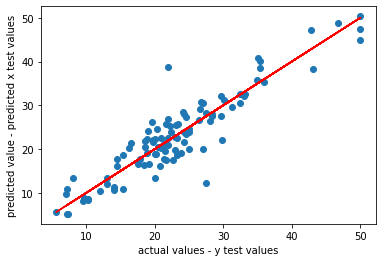

In [76]:
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, 'r')
plt.xlabel('actual values - y test values')
plt.ylabel('predicted value - predicted x test values')
plt.show()

It was kind of a capstone project for me because I tried the new methods that I've just learn but so far I enjoy a lot.During the project I changed the epochs, batch and number of the layers many times to optimize my model. Also this time I visualize the actual values and predicted values in a plot which has quite good line that means we have not a bad model(at this point I cant say that we have a succesful model it has to developed more with hypertuning methods). 